In [1]:
# Importing the librarues
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# reading the dataset
df = pd.read_csv("cleaned_data")
df.sample(5)

,company_name,model_name,processor_name,ram,processor_generation,operating_system,storage,rating,price,screen_size(inch)
63,APPLE,APPLE 2022 MacBook AIR M2 -,Apple M2,8 GB Unified Memory,NaN,Mac OS,512 GB SSD34.54,5.0,"₹1,39,990",13.6
10,HP,HP Pavilion Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,8 GB DDR4,NaN,64 bit Windows 11,512 GB SSD39.62,4.4,"₹59,990",15.6
126,ASUS,ASUS Zenbook 13 Intel EVO Core,Intel Core i5,16 GB LPDDR4,11th Gen,64 bit Windows 11,512 GB SSD33.78,4.7,"₹71,990",13.3
219,DELL,DELL Vostro Core i3 10th Gen,NaN,: 10th Generation Intel Core i3-1005G1,: 10th Generation Intel Core i3-1005G1,: 10th Generation Intel Core i3-1005G1,: 10th Generation Intel Core i3-1005G1,4.1,"₹43,090",: 10th Generation Intel Core i3-1005G1
54,Infinix,Infinix INBook X1 Neo Series Celeron,Intel Celeron Quad Core,8 GB LPDDR4X,NaN,64 bit Windows 11,256 GB SSD35.56,4.2,"₹22,990",14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          423 non-null    object 
 1   model_name            423 non-null    object 
 2   processor_name        413 non-null    object 
 3   ram                   419 non-null    object 
 4   processor_generation  253 non-null    object 
 5   operating_system      423 non-null    object 
 6   storage               423 non-null    object 
 7   rating                423 non-null    float64
 8   price                 423 non-null    object 
 9   screen_size(inch)     423 non-null    object 
dtypes: float64(1), object(9)
memory usage: 33.2+ KB


### Basic preprocessing

In [4]:
# Changing the dtype of screensize
df["screen_size(inch)"].value_counts()

 15.6                                                                                                                  168
 15.6                                                                                                                   66
 14                                                                                                                     65
 14                                                                                                                     22
 13.3                                                                                                                    9
 16                                                                                                                      7
 17.3                                                                                                                    6
 13.3                                                                                                                    6
 16             

In [5]:
df["screen_size(inch)"] = df["screen_size(inch)"].apply(lambda x : x.split(" ")[1])

In [6]:
df["screen_size(inch)"].value_counts()

15.6      234
14         92
13.3       18
16         15
17.3       10
16.1        8
&           8
11.6        8
13.4        5
16.2        5
14.1        4
15          4
13.6        3
14.2        2
Office      1
11th        1
10th        1
13          1
14.96       1
13.5        1
16.6        1
Name: screen_size(inch), dtype: int64

In [7]:
df["screen_size(inch)"] = df["screen_size(inch)"].apply(lambda x : x.replace("Office", "14").replace("11th", "15.6").replace("10th", "15.6").replace("&", "15.6"))

In [8]:
df["screen_size(inch)"].value_counts()

15.6     244
14        93
13.3      18
16        15
17.3      10
11.6       8
16.1       8
13.4       5
16.2       5
14.1       4
15         4
13.6       3
14.2       2
13         1
14.96      1
13.5       1
16.6       1
Name: screen_size(inch), dtype: int64

In [9]:
df["screen_size(inch)"] = df["screen_size(inch)"].astype("float64")

In [10]:
df.dtypes

company_name             object
model_name               object
processor_name           object
ram                      object
processor_generation     object
operating_system         object
storage                  object
rating                  float64
price                    object
screen_size(inch)       float64
dtype: object

In [11]:
df["price"] = df["price"].apply(lambda x :x.replace("₹","").replace(",","")).astype("float64")

In [12]:
df.dtypes

company_name             object
model_name               object
processor_name           object
ram                      object
processor_generation     object
operating_system         object
storage                  object
rating                  float64
price                   float64
screen_size(inch)       float64
dtype: object

In [13]:
def filter_ram(s):
    try:
        s = s.split("GB")
        return s[0]
    except Exception as e:
        pass
def filter_ram_type(s):
    try:
        s = s.split("GB")
        return s[1]
    except Exception as e:
        pass

In [14]:
df["ram_capacity"] = df["ram"].apply(filter_ram)

In [15]:
df["ram_type"] = df["ram"].apply(filter_ram_type)

In [16]:
df = df.drop(["ram"], axis=1)

In [17]:
df.dtypes

company_name             object
model_name               object
processor_name           object
processor_generation     object
operating_system         object
storage                  object
rating                  float64
price                   float64
screen_size(inch)       float64
ram_capacity             object
ram_type                 object
dtype: object

In [18]:
df["storage"] = df["storage"].apply(lambda x : x.split("SSD")[0].split("&")[-1])

In [19]:
df["storage"].value_counts()

512 GB                                                                                     217
1 TB                                                                                        74
256 GB                                                                                      61
1 TB HDD|256 GB                                                                             23
1 TB HDD39.62                                                                                9
2 TB                                                                                         6
29.46                                                                                        5
128 GB                                                                                       4
35.56                                                                                        3
 512GB                                                                                       3
1 TB HDD35.56                                     

In [20]:
df["storage"] = df["storage"].apply(lambda x : x.replace(": 10th Generation Intel Core i3-1005G1","512 GB").replace(": 11th Generation Intel Core i5-1135G7","512 GB").replace("Student IncludedStylish Thin and Light Laptop without Optical Disk DriveIntel Core i5","512 GB").replace("S 2021","512 GB"))

In [21]:
df["storage"].value_counts()

512 GB                219
1 TB                   74
256 GB                 61
1 TB HDD|256 GB        23
1 TB HDD39.62           9
2 TB                    6
29.46                   5
128 GB                  4
 512GB                  3
35.56                   3
1 TB HDD35.56           3
1 TB HDD|128 GB         2
 1TB + 256GB            2
 256GB                  2
1 TB HDD|512 GB         2
39.62                   1
512 GB                  1
 512 GB                 1
256 GB HDD|256 GB       1
1 TB HDD35.81           1
Name: storage, dtype: int64

In [22]:
df["storage"] = df["storage"].apply(lambda x:x.split("HDD")[-1].split("+")[-1].split("|")[-1].replace("39.62","512 GB"))

In [23]:
df["storage"].value_counts()

512 GB      231
256 GB       85
1 TB         74
35.56         6
128 GB        6
2 TB          6
29.46         5
 256GB        4
 512GB        3
 512 GB       1
512 GB        1
35.81         1
Name: storage, dtype: int64

In [24]:
df["storage"] = df["storage"].apply(lambda x:x.replace("35.56","512 GB").replace("29.46","512 GB").replace("35.81","512 GB"))

In [25]:
df["storage"].value_counts()

512 GB      243
256 GB       85
1 TB         74
128 GB        6
2 TB          6
 256GB        4
 512GB        3
 512 GB       1
512 GB        1
Name: storage, dtype: int64

In [26]:
df["storage"] = df["storage"].apply(lambda x :x.split("GB")[0].split("TB")[0])

In [27]:
df["storage"] = df["storage"].str.strip()

In [28]:
df["storage"] = df["storage"].astype("int64")

In [29]:
df.dtypes

company_name             object
model_name               object
processor_name           object
processor_generation     object
operating_system         object
storage                   int64
rating                  float64
price                   float64
screen_size(inch)       float64
ram_capacity             object
ram_type                 object
dtype: object

In [30]:
df["ram_type"].dtype

dtype('O')

In [31]:
df.nunique()

company_name             16
model_name              281
processor_name           40
processor_generation     11
operating_system         20
storage                   5
rating                   18
price                   251
screen_size(inch)        17
ram_capacity              9
ram_type                  7
dtype: int64

In [32]:
def data_type(df):
    cat_var=[]
    num_var=[]
    for i in df.columns:
        if df[i].dtype=="O":
            print(i,": Object type")
            cat_var.append(i)
        else:
            print(i,": Number Type")
            num_var.append(i)
    df.drop_duplicates()
    return cat_var, num_var

In [33]:
cat_var, num_var = data_type(df)

company_name : Object type
model_name : Object type
processor_name : Object type
processor_generation : Object type
operating_system : Object type
storage : Number Type
rating : Number Type
price : Number Type
screen_size(inch) : Number Type
ram_capacity : Object type
ram_type : Object type


In [34]:
# EDA 

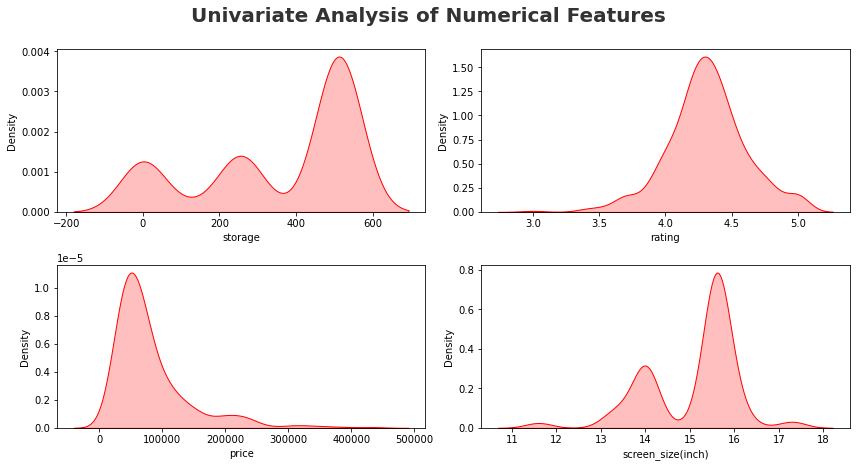

In [35]:
plt.figure(figsize=(12, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_var)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[num_var[i]],shade=True, color='r')
    plt.xlabel(num_var[i])
    plt.tight_layout()

### Observations
* According to the data most of the laptops have the screen size 15.5 inch to 16 inch
* Most of the laptops has minimum storate more than 400GB

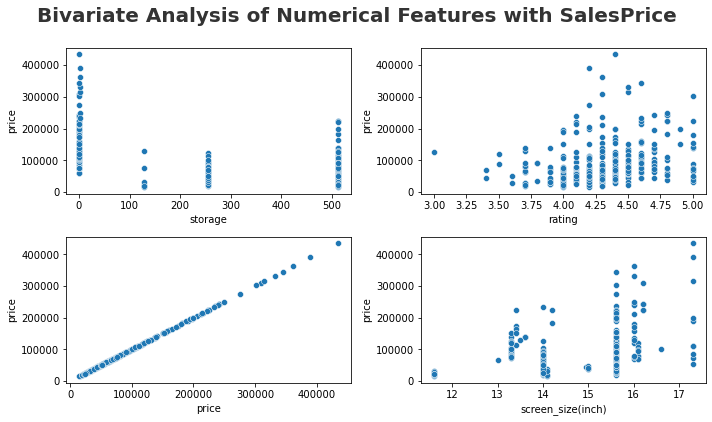

In [36]:
plt.figure(figsize=(10, 50))
plt.suptitle('Bivariate Analysis of Numerical Features with SalesPrice', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.scatterplot(x=df[num_var[i]],y=df["price"],palette="deep")
    plt.tight_layout()

In [37]:
# Doing the multivariate analysis

<AxesSubplot:>

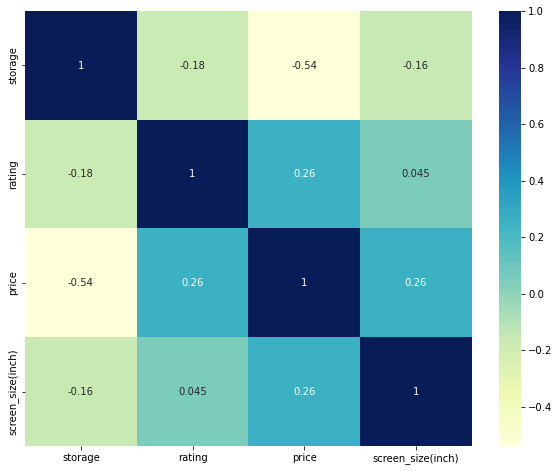

In [38]:
plt.figure(figsize = (10,8))
sns.heatmap(df[num_var].corr(), cmap="YlGnBu",annot=True)

<Figure size 576x288 with 0 Axes>

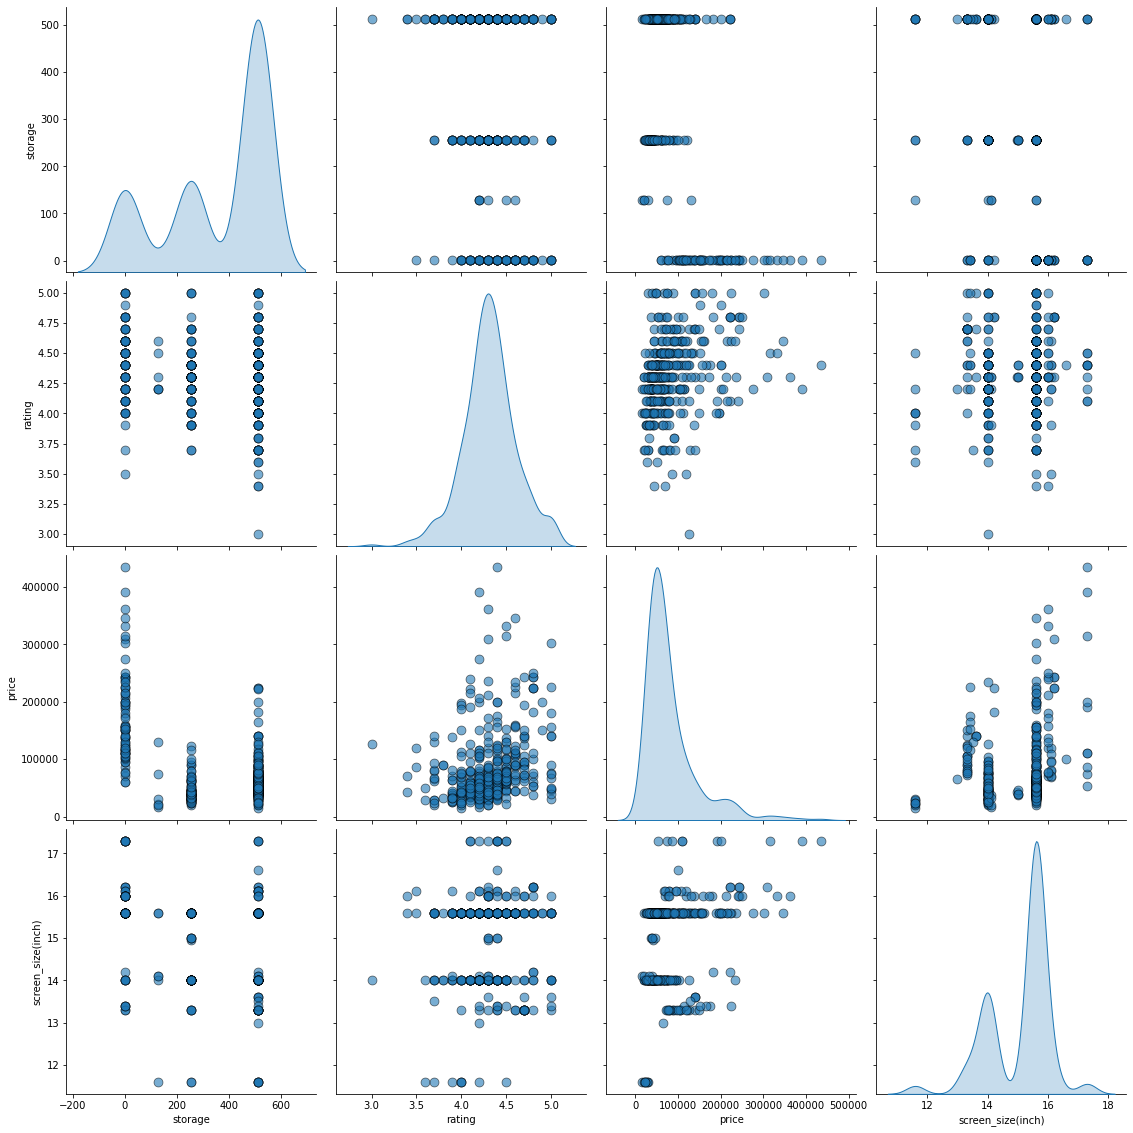

In [39]:
plt.figure(figsize=(8,4))
plt.suptitle('Multivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(df,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [40]:
# Visualizing the target

Text(0, 0.5, 'Count')

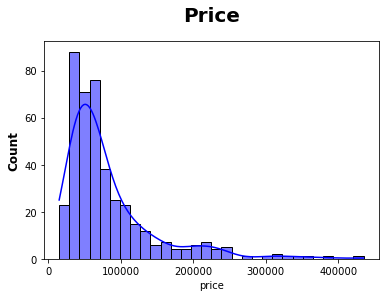

In [41]:
sns.histplot(df.price, kde=True, color='b')
plt.title("Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)

<AxesSubplot:>

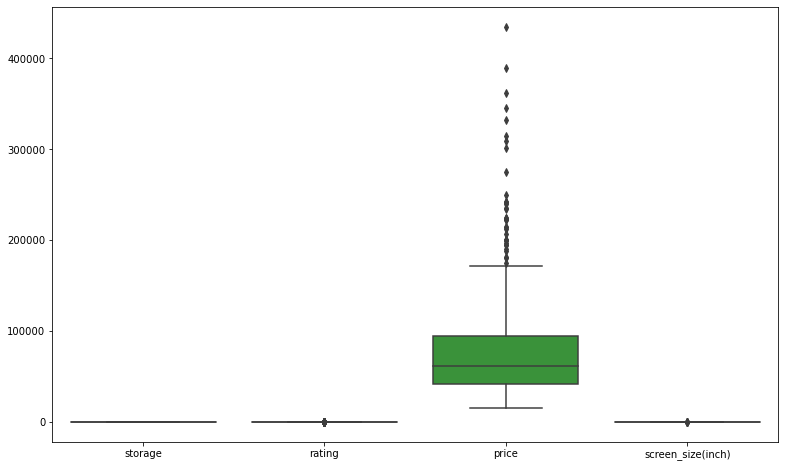

In [42]:
# Checking the outliers
plt.figure(figsize=(13,8))
sns.boxplot(data=df)

In [43]:
# EDA for Categorical Data
len(cat_var)

7

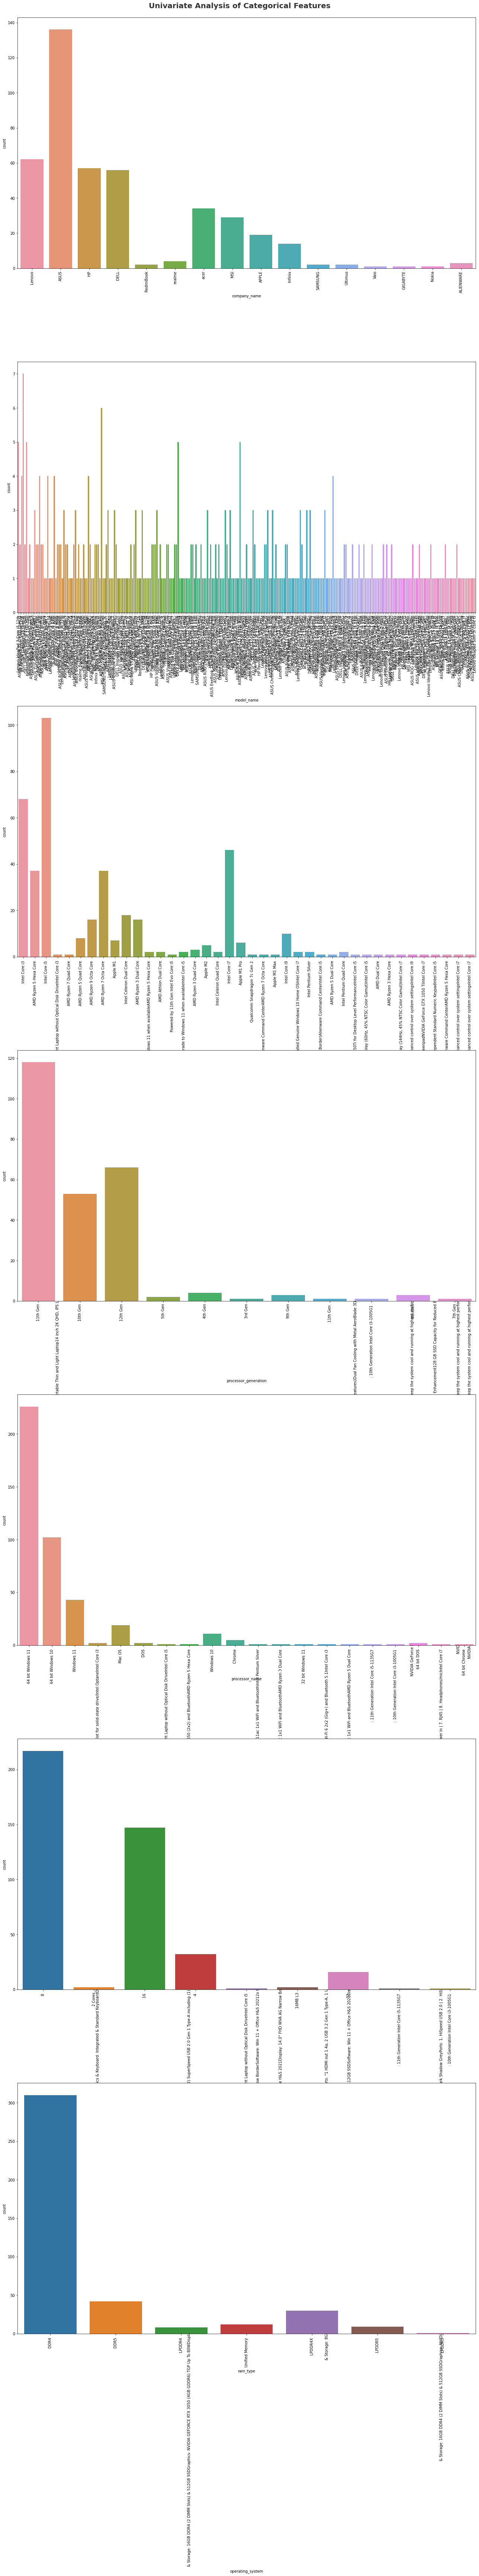

In [44]:
# categorical columns
plt.figure(figsize=(18, 100))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(cat_var)):
    plt.subplot(8, 1, i+1)
    sns.countplot(x=df[cat_var[i]])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [45]:
df.head()

,company_name,model_name,processor_name,processor_generation,operating_system,storage,rating,price,screen_size(inch),ram_capacity,ram_type
0,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,11th Gen,64 bit Windows 11,256,4.2,36990.0,14.0,8,DDR4
1,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,11th Gen,64 bit Windows 11,512,4.2,39990.0,15.6,8,DDR4
2,ASUS,ASUS VivoBook 15 (2022) Core i3,Intel Core i3,10th Gen,64 bit Windows 11,512,4.3,32990.0,15.6,8,DDR4
3,HP,HP Pavilion Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,NaN,64 bit Windows 10,512,4.4,49990.0,15.6,8,DDR4
4,ASUS,ASUS TUF Gaming F15 Core i5,Intel Core i5,10th Gen,Windows 11,512,4.4,49990.0,15.6,8,DDR4


In [46]:
df.isna().mean()

company_name            0.000000
model_name              0.000000
processor_name          0.023641
processor_generation    0.401891
operating_system        0.000000
storage                 0.000000
rating                  0.000000
price                   0.000000
screen_size(inch)       0.000000
ram_capacity            0.009456
ram_type                0.026005
dtype: float64

In [47]:
df.processor_name = df.processor_name.fillna(df.processor_name.mode()[0])

In [48]:
df.processor_generation = df.processor_generation.fillna(df.processor_generation.mode()[0])

In [49]:
df.ram_capacity = df.ram_capacity.fillna(df.ram_capacity.mode()[0])

In [50]:
df.ram_type = df.ram_type.fillna(df.ram_type.mode()[0])

In [51]:
df.processor_generation.value_counts()

11th Gen                                   288
12th Gen                                    66
10th Gen                                    53
4th Gen                                      4
9th Gen                                      3
8th Gen                                      3
5th Gen                                      2
3rd Gen                                      1
11th Gen                                     1
: 10th Generation Intel Core i3-1005G1       1
7th Gen                                      1
Name: processor_generation, dtype: int64

In [52]:
df.processor_generation = df.processor_generation.apply(lambda x : x.replace(": 10th Generation Intel Core i3-1005G1","10th Gen"))

In [53]:
df.operating_system.value_counts()

64 bit Windows 11                                                                                                                                                                                                                                                                                                                                                                                                                                                                     226
64 bit Windows 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                     102
Windows 11                                          

In [54]:
# 64 bit Windows 11, 64 bit Windows 10, Windows 11, Mac OS,Windows 10, Chrome

In [55]:
# dt["operating_system"]

In [57]:
df.isna().mean()

company_name            0.0
model_name              0.0
processor_name          0.0
processor_generation    0.0
operating_system        0.0
storage                 0.0
rating                  0.0
price                   0.0
screen_size(inch)       0.0
ram_capacity            0.0
ram_type                0.0
dtype: float64

In [58]:
dt = {}
for feature in cat_var:
    labels_ordered=df.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i, k in enumerate(labels_ordered,0)}
    dt[feature] = labels_ordered
    df[feature]=df[feature].map(labels_ordered)

In [59]:
df["storage"].value_counts()

512    248
256     89
1       74
128      6
2        6
Name: storage, dtype: int64

In [60]:
# dt["storage"]

In [61]:
value1 = "RedmiBook"

In [62]:
# [,dt["company_name"][value1]]

In [63]:
X = df.drop(columns=["model_name", "price", "rating"])
y = df.price

In [64]:
# train test split
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [66]:
X_train

,company_name,processor_name,processor_generation,operating_system,storage,screen_size(inch),ram_capacity,ram_type
415,12,27,6,17,1,16.0,7,4
360,6,31,6,14,512,15.6,7,2
402,11,31,9,17,512,15.6,7,4
325,8,37,6,17,1,15.6,7,2
376,12,8,6,14,256,15.6,3,2
...,...,...,...,...,...,...,...,...
343,6,2,6,14,512,15.6,0,2
359,11,19,6,14,512,14.0,3,2
323,6,8,4,14,512,15.6,0,2
280,12,31,6,16,512,15.6,7,2


In [67]:
X_test

,company_name,processor_name,processor_generation,operating_system,storage,screen_size(inch),ram_capacity,ram_type
136,7,19,6,16,512,14.0,7,1
381,8,23,5,14,128,15.6,3,2
244,6,27,6,14,512,14.0,3,2
152,14,32,6,19,256,13.3,3,5
23,6,7,6,17,512,15.6,3,2
...,...,...,...,...,...,...,...,...
418,11,19,9,17,512,13.3,7,4
27,8,14,6,17,512,15.6,3,2
254,12,19,4,14,512,15.6,3,2
357,9,20,2,15,512,15.6,3,2


In [68]:
y_train

415    171990.0
360    109990.0
402    221774.0
325    124990.0
376     36990.0
         ...   
343     27490.0
359     55690.0
323     33499.0
280     56990.0
8       46990.0
Name: price, Length: 317, dtype: float64

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
lr.score(X_test, y_test)

0.7668000896622609

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_estimators=100,oob_score=True, bootstrap=True,)

In [74]:
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [75]:
rf.score(X_test, y_test)

0.8784984570309292

In [76]:
from sklearn.ensemble import AdaBoostRegressor

In [77]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)

AdaBoostRegressor()

In [78]:
adb.score(X_test, y_test)

0.8404365508236704

In [79]:
import pickle
pickle.dump(rf, open("model.pkl","wb"))

In [80]:
y_test

136     64999.0
381     74590.0
244     55600.0
152    121990.0
23      35590.0
         ...   
418     76590.0
27      47990.0
254     51990.0
357     64590.0
259     41090.0
Name: price, Length: 106, dtype: float64

In [81]:
# adb.predict([[7,19,6,16,512,4.2,14.0,7,1]])

In [84]:
pickle.dump(rf, open("dictionary_map.pkl","wb"))

In [85]:
model = pickle.load(open("model.pkl", "rb"))

In [86]:
model.predict([[7,19,6,16,512,14.0,7,1]])

array([75825.96666667])

In [87]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9751941705121775, 0.8784984570309292)

In [88]:
# The difference between the train accuracy and the test accuracy is 10% which is okay
# so we can say our model is not overfitted

In [89]:
from sklearn.model_selection import GridSearchCV

In [93]:
params = {
"n_estimators":[100, 200],
"max_depth":[5, 10],
"min_samples_split":[2, 5],
"min_samples_leaf":[1, 2],
"ccp_alpha":[0.0, 0.2],
"max_samples":[1, 2]
}

In [94]:
gscv = GridSearchCV(rf, param_grid=params, cv=5)

In [95]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'ccp_alpha': [0.0, 0.2], 'max_depth': [5, 10],
                         'max_samples': [1, 2], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [97]:
gscv.best_params_

{'ccp_alpha': 0.2,
 'max_depth': 10,
 'max_samples': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [98]:
rf = RandomForestRegressor(n_estimators=100,ccp_alpha=0.2, oob_score=True, max_samples=2, min_samples_leaf=1, min_samples_split=2)

In [99]:
rf.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=0.2, max_samples=2, oob_score=True)

In [101]:
rf.score(X_test, y_test)

0.18606497349570028